# Wine Quality Analysis - Exploratory Data Analysis

Dieses Notebook analysiert den Red Wine Quality Datensatz und bereitet die Daten für Machine Learning Modelle (Random Forest und Neural Network) vor.


In [19]:
# Import notwendiger Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Konfiguration
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Pfad zum Datensatz
DATA_PATH = 'Base-Data/winequality-red.csv'

print("Bibliotheken erfolgreich importiert!")


Bibliotheken erfolgreich importiert!


## 1. Daten einlesen und erste Inspektion


In [20]:
# Daten einlesen
df = pd.read_csv(DATA_PATH)

print(f"Datensatz Form: {df.shape}")
print(f"\nErste 5 Zeilen:")
df.head()


Datensatz Form: (1599, 12)

Erste 5 Zeilen:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
# Grundlegende Informationen über den Datensatz
print("=== DATENSATZ INFORMATIONEN ===\n")
print(f"Anzahl Zeilen: {df.shape[0]}")
print(f"Anzahl Spalten: {df.shape[1]}")
print(f"\nSpaltennamen:")
print(df.columns.tolist())
print(f"\nDatentypen:")
print(df.dtypes)


=== DATENSATZ INFORMATIONEN ===

Anzahl Zeilen: 1599
Anzahl Spalten: 12

Spaltennamen:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Datentypen:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [22]:
# Prüfung auf fehlende Werte
print("=== FEHLENDE WERTE ===\n")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Fehlende Werte': missing_values,
    'Prozent': missing_percent
})
print(missing_df[missing_df['Fehlende Werte'] > 0])
if missing_df['Fehlende Werte'].sum() == 0:
    print("\n✓ Keine fehlenden Werte gefunden!")


=== FEHLENDE WERTE ===

Empty DataFrame
Columns: [Fehlende Werte, Prozent]
Index: []

✓ Keine fehlenden Werte gefunden!


In [23]:
# Prüfung auf Duplikate
print("=== DUPLIKATE ===\n")
duplicates = df.duplicated().sum()
print(f"Anzahl Duplikate: {duplicates}")
print(f"Prozent Duplikate: {(duplicates/len(df))*100:.2f}%")
if duplicates > 0:
    print(f"\nErste 5 duplizierte Zeilen:")
    print(df[df.duplicated(keep=False)].head(10))


=== DUPLIKATE ===

Anzahl Duplikate: 240
Prozent Duplikate: 15.01%

Erste 5 duplizierte Zeilen:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00            1.90      0.076   
4             7.4             0.700         0.00            1.90      0.076   
9             7.5             0.500         0.36            6.10      0.071   
11            7.5             0.500         0.36            6.10      0.071   
22            7.9             0.430         0.21            1.60      0.106   
27            7.9             0.430         0.21            1.60      0.106   
39            7.3             0.450         0.36            5.90      0.074   
40            7.3             0.450         0.36            5.90      0.074   
64            7.2             0.725         0.05            4.65      0.086   
65            7.2             0.725         0.05            4.65      0.086   

    free sulfur dioxide  total sul

In [24]:
# Deskriptive Statistiken
print("=== DESKRIPTIVE STATISTIKEN ===\n")
df.describe()


=== DESKRIPTIVE STATISTIKEN ===



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
# Verteilung der Zielvariable (Quality)
print("=== VERTEILUNG DER ZIELVARIABLE (QUALITY) ===\n")
quality_counts = df['quality'].value_counts().sort_index()
print(quality_counts)
print(f"\nProzentuale Verteilung:")
print((quality_counts / len(df) * 100).round(2))
print(f"\nMin: {df['quality'].min()}, Max: {df['quality'].max()}")
print(f"Mittelwert: {df['quality'].mean():.2f}")
print(f"Median: {df['quality'].median():.2f}")
print(f"Standardabweichung: {df['quality'].std():.2f}")


=== VERTEILUNG DER ZIELVARIABLE (QUALITY) ===

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Prozentuale Verteilung:
quality
3     0.63
4     3.31
5    42.59
6    39.90
7    12.45
8     1.13
Name: count, dtype: float64

Min: 3, Max: 8
Mittelwert: 5.64
Median: 6.00
Standardabweichung: 0.81


## 2. Datenvisualisierung


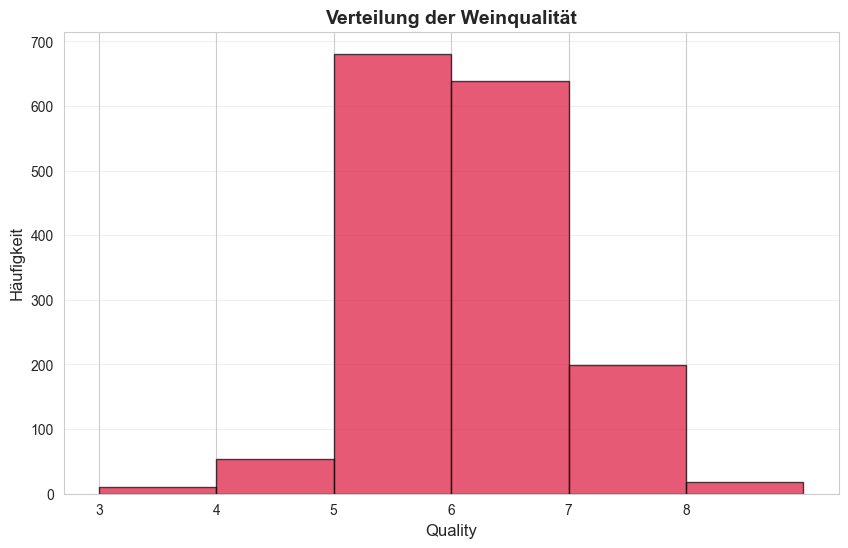

In [26]:
# Histogramm der Zielvariable
plt.figure(figsize=(10, 6))
plt.hist(df['quality'], bins=range(df['quality'].min(), df['quality'].max()+2), 
         edgecolor='black', alpha=0.7, color='crimson')
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.title('Verteilung der Weinqualität', fontsize=14, fontweight='bold')
plt.xticks(range(df['quality'].min(), df['quality'].max()+1))
plt.grid(axis='y', alpha=0.3)
plt.show()


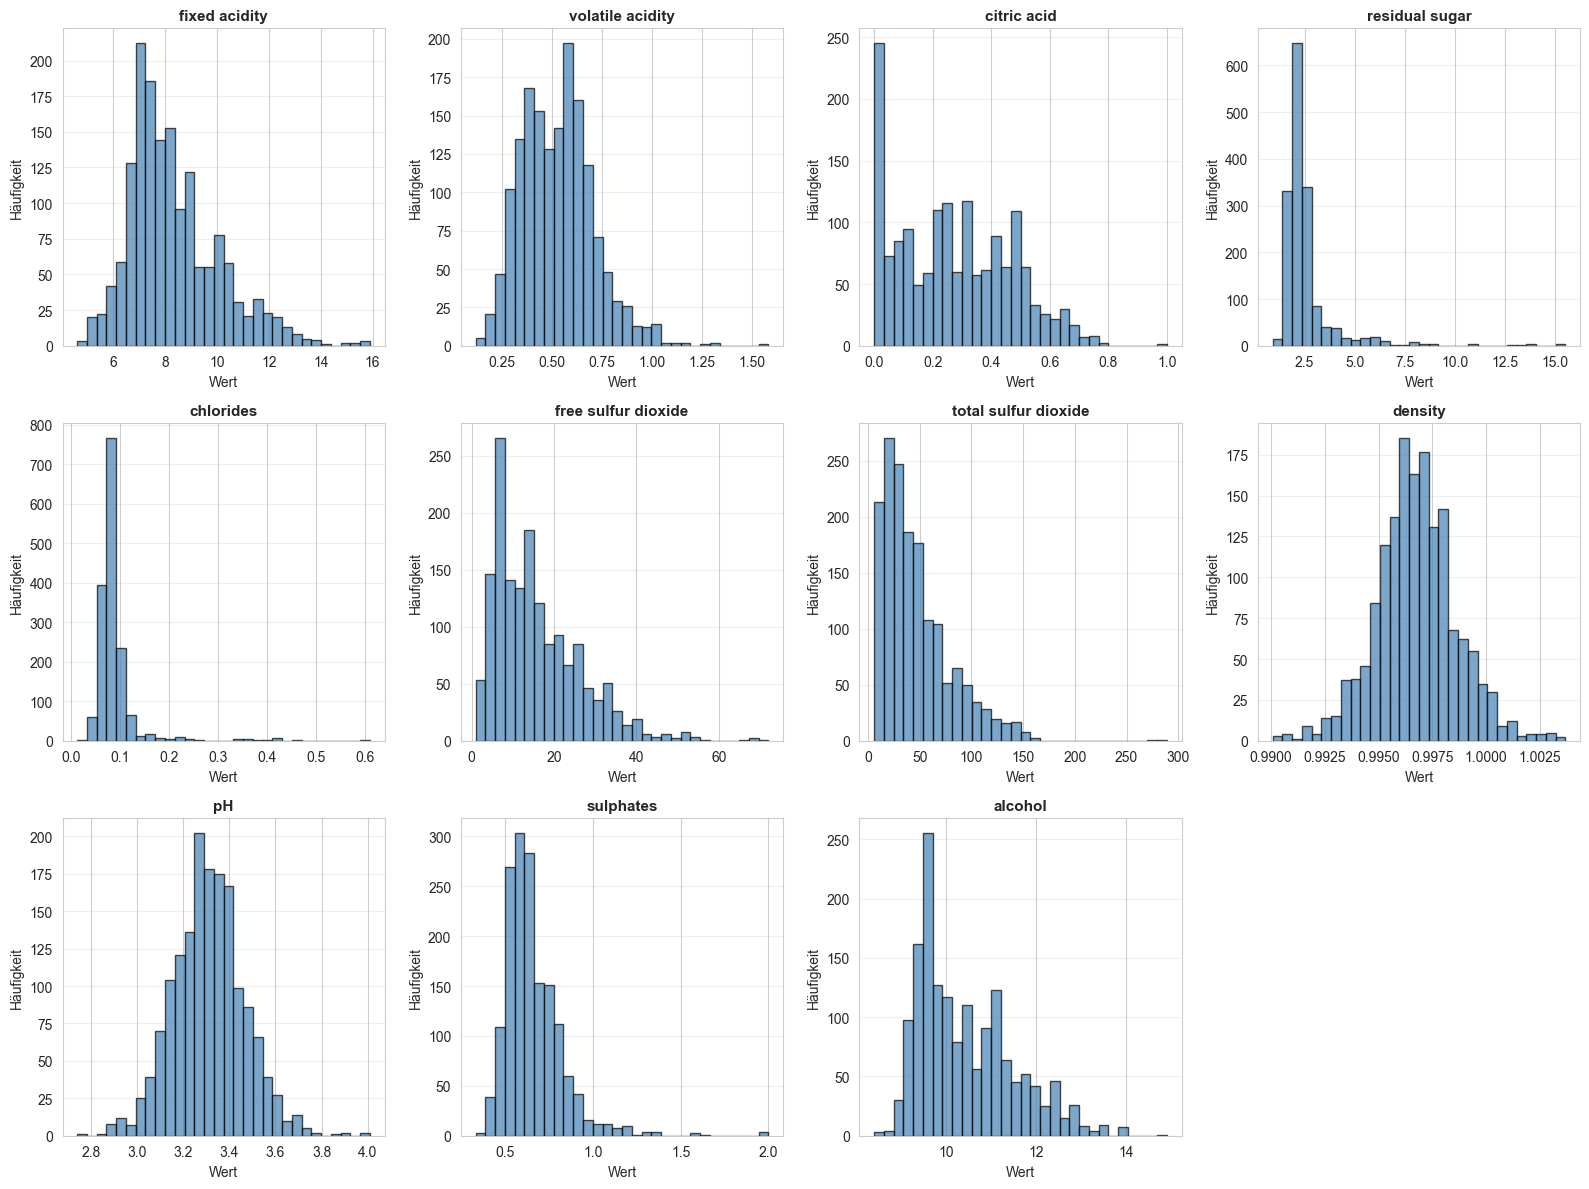

In [27]:
# Histogramme aller Features
features = df.columns.drop('quality')
n_features = len(features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Wert')
    axes[i].set_ylabel('Häufigkeit')
    axes[i].grid(axis='y', alpha=0.3)

# Entferne leere Subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


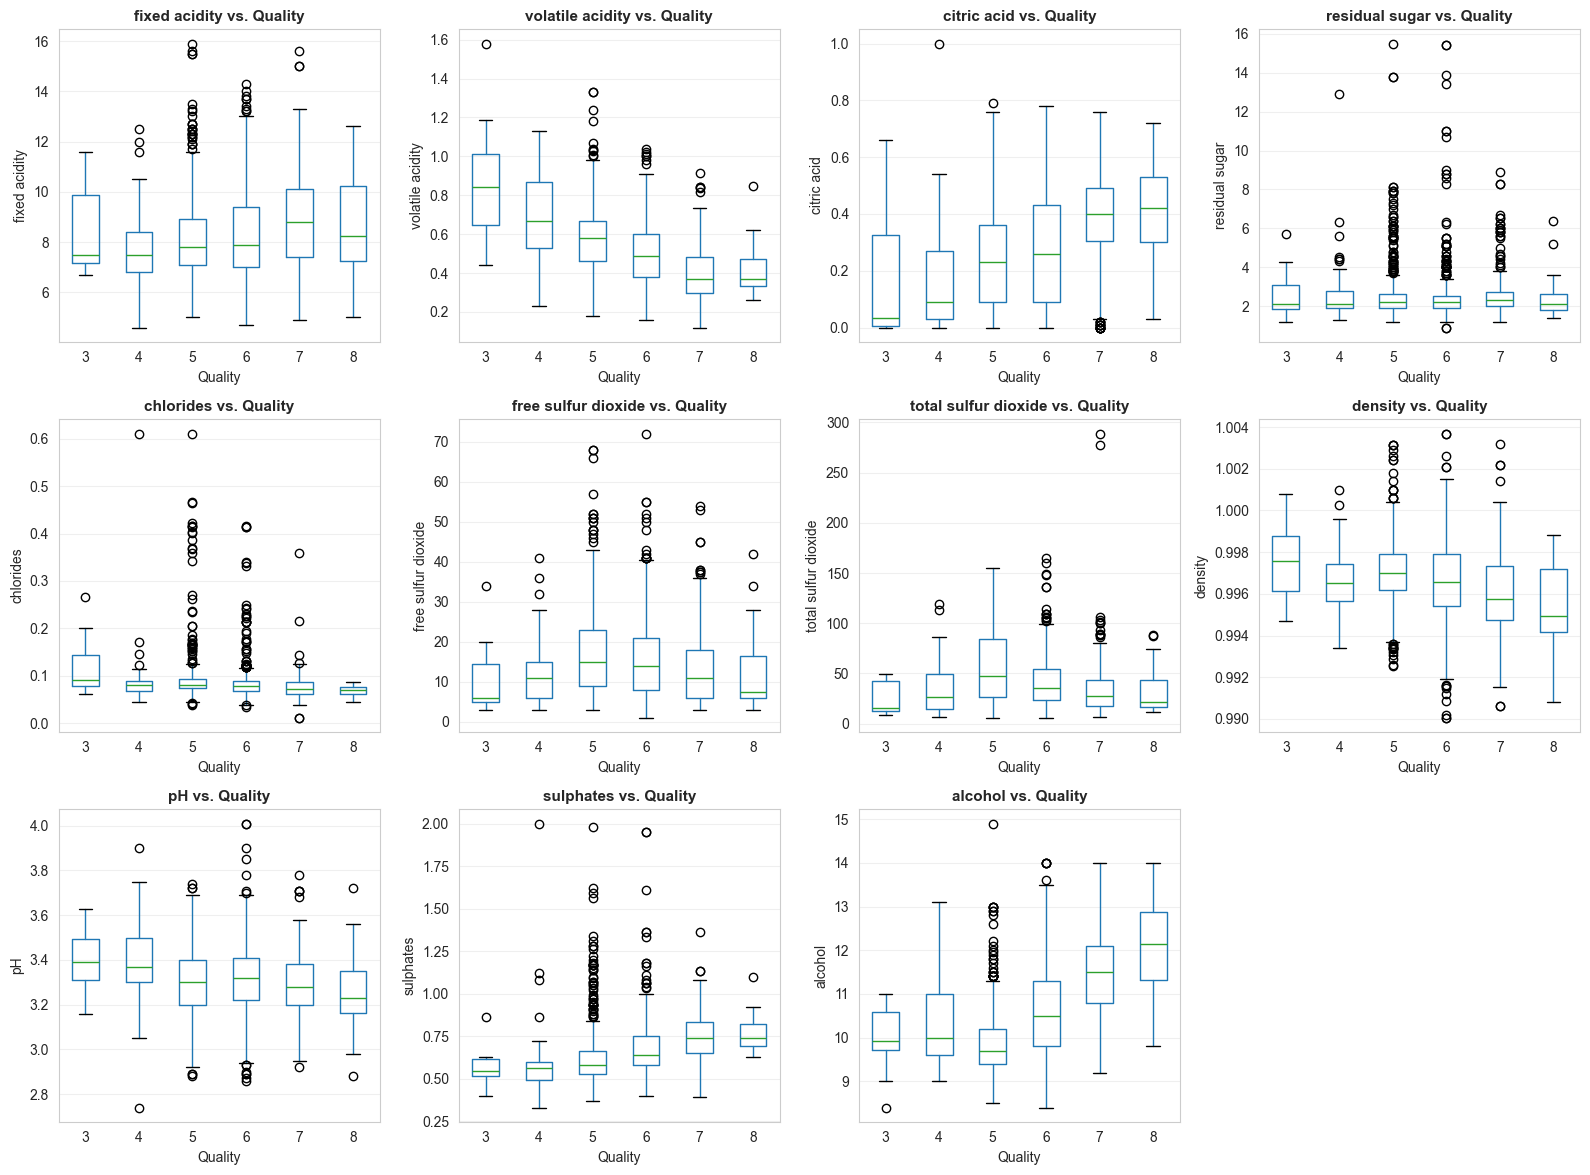

In [28]:
# Boxplots: Features vs. Quality
features = df.columns.drop('quality')
n_features = len(features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    df.boxplot(column=feature, by='quality', ax=axes[i], grid=False)
    axes[i].set_title(f'{feature} vs. Quality', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(feature)
    axes[i].grid(axis='y', alpha=0.3)

# Entferne leere Subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('')  # Entferne automatischen Titel
plt.tight_layout()
plt.show()


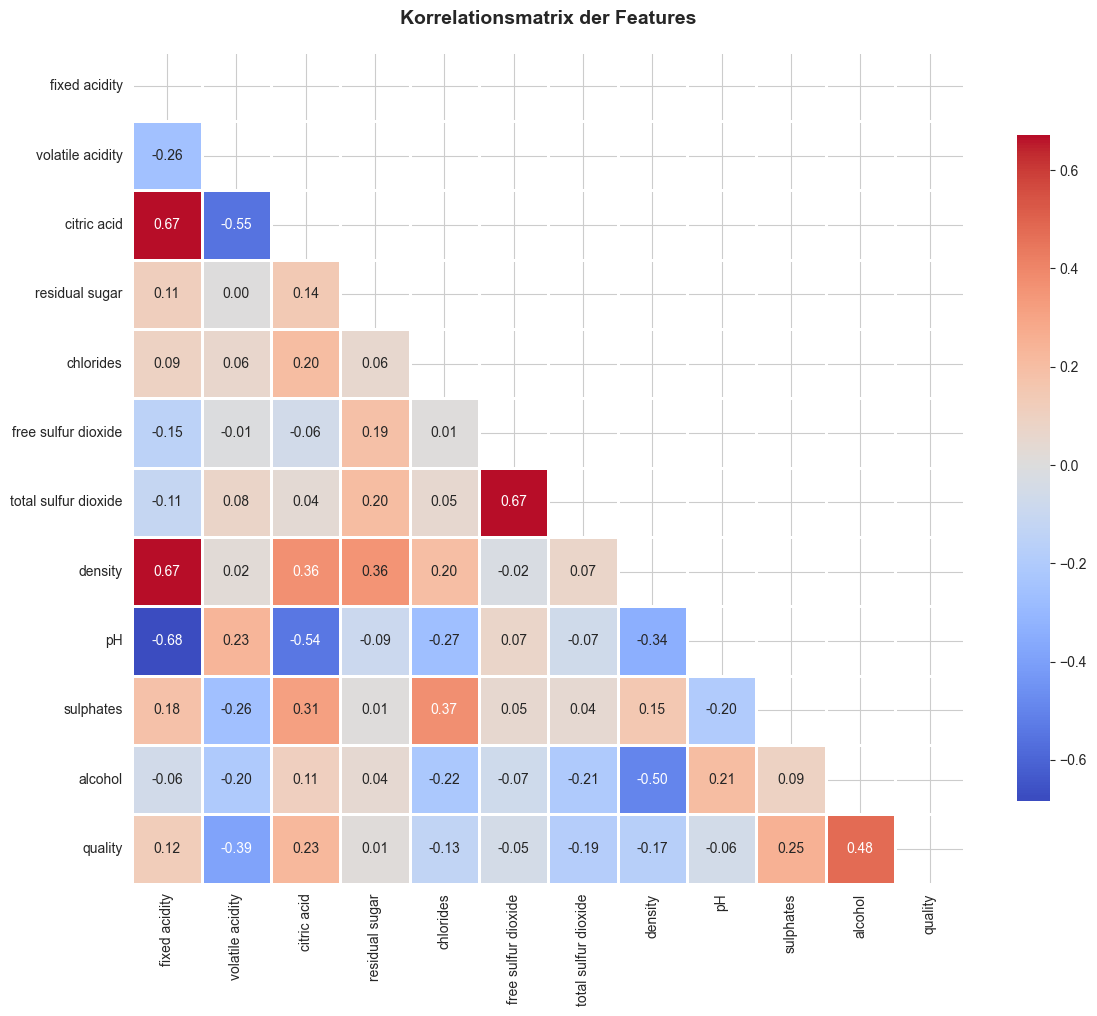

In [29]:
# Korrelationsmatrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Obere Dreiecksmatrix ausblenden
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Korrelationsmatrix der Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


=== KORRELATIONEN MIT QUALITY ===

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


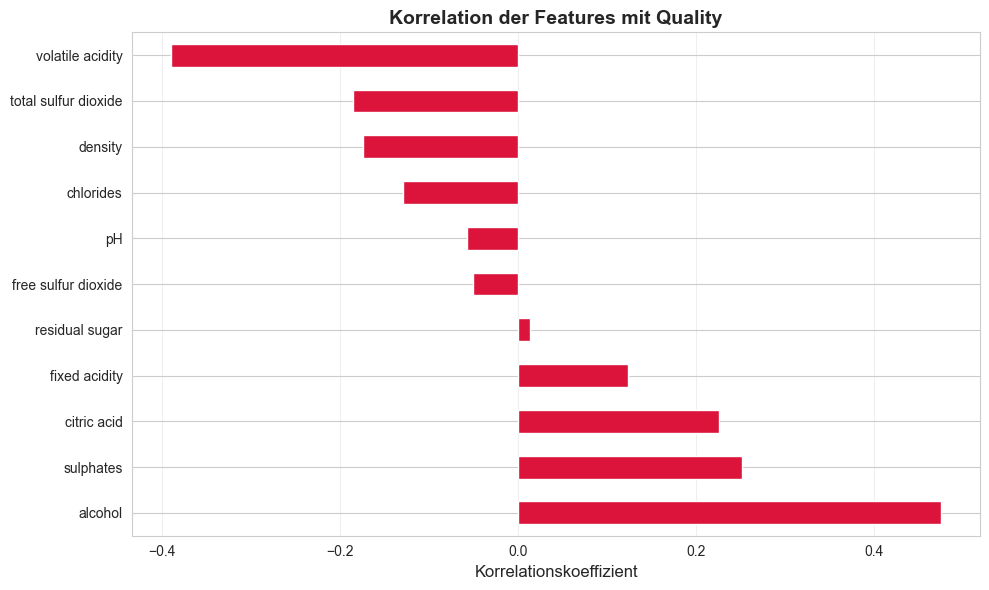

In [30]:
# Korrelationen mit der Zielvariable (Quality)
print("=== KORRELATIONEN MIT QUALITY ===\n")
quality_corr = df.corr()['quality'].sort_values(ascending=False)
quality_corr = quality_corr.drop('quality')  # Entferne Quality mit sich selbst
print(quality_corr)

# Visualisierung
plt.figure(figsize=(10, 6))
quality_corr.plot(kind='barh', color='crimson')
plt.xlabel('Korrelationskoeffizient', fontsize=12)
plt.title('Korrelation der Features mit Quality', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


Top 6 Features nach Korrelation mit Quality: ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide', 'density']


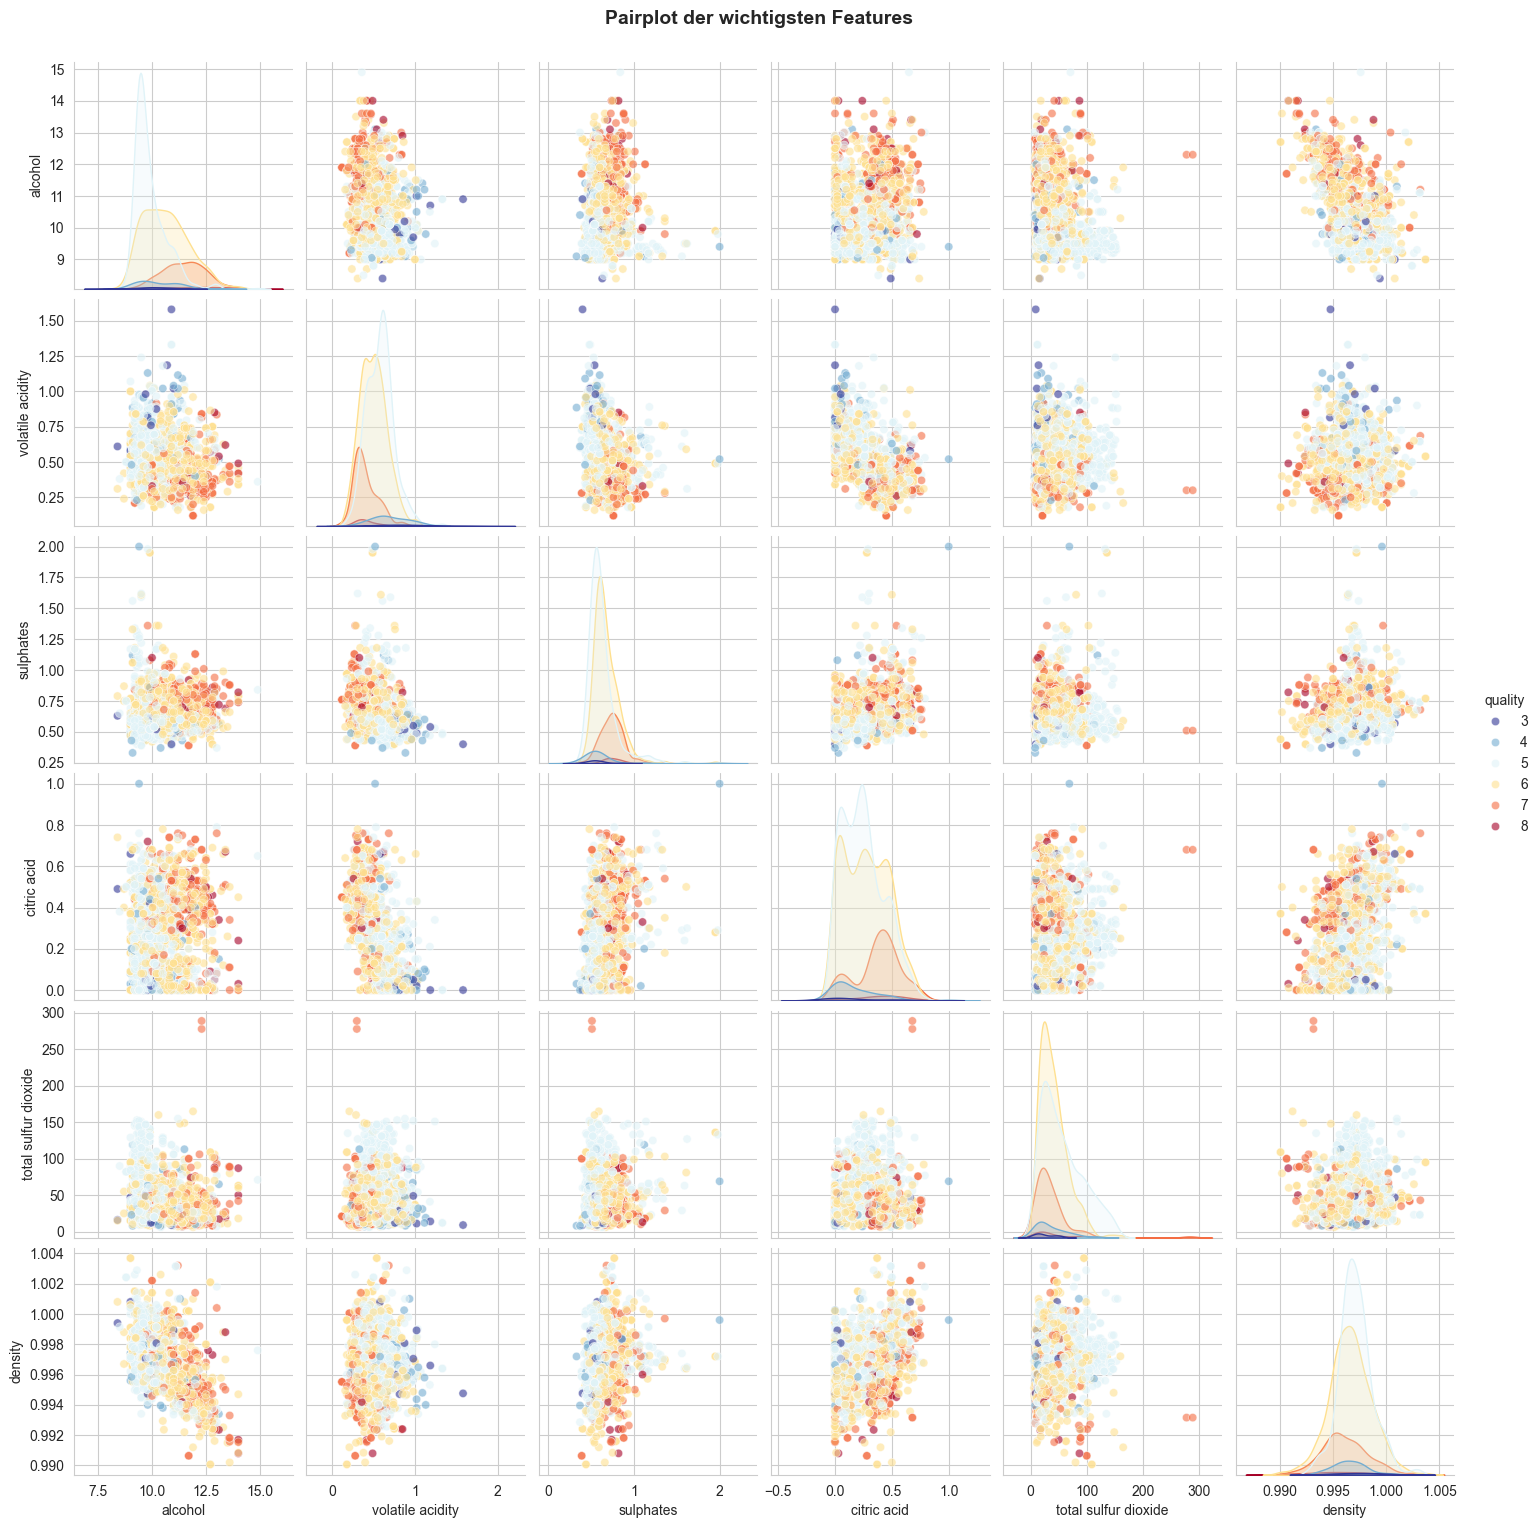

In [31]:
# Pairplot für ausgewählte Features (kann bei vielen Features lange dauern)
# Wir wählen die Features mit höchster Korrelation zu Quality
top_features = quality_corr.abs().nlargest(6).index.tolist()
print(f"Top 6 Features nach Korrelation mit Quality: {top_features}")

sns.pairplot(df[top_features + ['quality']], hue='quality', palette='RdYlBu_r', 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot der wichtigsten Features', fontsize=14, fontweight='bold', y=1.02)
plt.show()


In [32]:
# Duplikate entfernen (falls vorhanden)
df_clean = df.copy()
initial_shape = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
final_shape = df_clean.shape[0]
removed = initial_shape - final_shape

print(f"Ursprüngliche Anzahl Zeilen: {initial_shape}")
print(f"Nach Entfernen von Duplikaten: {final_shape}")
print(f"Entfernte Zeilen: {removed}")


Ursprüngliche Anzahl Zeilen: 1599
Nach Entfernen von Duplikaten: 1359
Entfernte Zeilen: 240


In [33]:
# Outlier-Analyse mit IQR-Methode
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=== OUTLIER-ANALYSE (IQR-Methode) ===\n")
features = df_clean.columns.drop('quality')
outlier_summary = []

for feature in features:
    outliers, lower, upper = detect_outliers_iqr(df_clean, feature)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df_clean)) * 100
    outlier_summary.append({
        'Feature': feature,
        'Anzahl Outliers': outlier_count,
        'Prozent': f"{outlier_percent:.2f}%",
        'Lower Bound': f"{lower:.2f}",
        'Upper Bound': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)


=== OUTLIER-ANALYSE (IQR-Methode) ===

                 Feature  Anzahl Outliers Prozent Lower Bound Upper Bound
0          fixed acidity               41   3.02%        3.95       12.35
1       volatile acidity               19   1.40%        0.02        1.02
2            citric acid                1   0.07%       -0.42        0.94
3         residual sugar              126   9.27%        0.85        3.65
4              chlorides               87   6.40%        0.04        0.12
5    free sulfur dioxide               26   1.91%      -14.00       42.00
6   total sulfur dioxide               45   3.31%      -39.50      124.50
7                density               35   2.58%        0.99        1.00
8                     pH               28   2.06%        2.92        3.68
9              sulphates               55   4.05%        0.28        1.00
10               alcohol               12   0.88%        7.10       13.50


In [34]:
# Feature und Target Definition
X = df_clean.drop('quality', axis=1)  # Features
y = df_clean['quality']  # Target

print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")
print(f"\nFeature Namen:")
print(X.columns.tolist())
print(f"\nTarget Statistik:")
print(y.describe())


Feature Matrix Shape: (1359, 11)
Target Vector Shape: (1359,)

Feature Namen:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Target Statistik:
count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


In [35]:
# Train-Test Split Vorbereitung
from sklearn.model_selection import train_test_split

# Split in Train und Test Set (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=== TRAIN-TEST SPLIT ===\n")
print(f"Train Set - Features: {X_train.shape}, Target: {y_train.shape}")
print(f"Test Set - Features: {X_test.shape}, Target: {y_test.shape}")
print(f"\nTrain Set Quality Verteilung:")
print(y_train.value_counts().sort_index())
print(f"\nTest Set Quality Verteilung:")
print(y_test.value_counts().sort_index())


=== TRAIN-TEST SPLIT ===

Train Set - Features: (1087, 11), Target: (1087,)
Test Set - Features: (272, 11), Target: (272,)

Train Set Quality Verteilung:
quality
3      8
4     42
5    461
6    428
7    134
8     14
Name: count, dtype: int64

Test Set Quality Verteilung:
quality
3      2
4     11
5    116
6    107
7     33
8      3
Name: count, dtype: int64


In [36]:
# Skalierung vorbereiten (für Neural Network wichtig)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler (Standardisierung: mean=0, std=1)
scaler_standard = StandardScaler()
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

# MinMaxScaler (Normalisierung: 0-1)
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

print("=== SKALIERUNG VORBEREITET ===\n")
print("StandardScaler:")
print(f"Train Mean: {X_train_scaled_standard.mean(axis=0).round(4)[:5]}...")
print(f"Train Std: {X_train_scaled_standard.std(axis=0).round(4)[:5]}...")
print(f"\nMinMaxScaler:")
print(f"Train Min: {X_train_scaled_minmax.min(axis=0).round(4)[:5]}...")
print(f"Train Max: {X_train_scaled_minmax.max(axis=0).round(4)[:5]}...")


=== SKALIERUNG VORBEREITET ===

StandardScaler:
Train Mean: [0. 0. 0. 0. 0.]...
Train Std: [1. 1. 1. 1. 1.]...

MinMaxScaler:
Train Min: [0. 0. 0. 0. 0.]...
Train Max: [1. 1. 1. 1. 1.]...


## 4. Zusammenfassung und nächste Schritte

### Wichtige Erkenntnisse:
1. **Datensatz**: [Anzahl Zeilen] Zeilen, [Anzahl Features] Features
2. **Zielvariable**: Quality (Werte von [min] bis [max])
3. **Fehlende Werte**: [Ja/Nein]
4. **Duplikate**: [Anzahl] entfernt
5. **Wichtigste Features** (nach Korrelation mit Quality):
   - [Feature 1]: [Korrelation]
   - [Feature 2]: [Korrelation]
   - [Feature 3]: [Korrelation]

### Nächste Schritte für ML-Modelle:
- **Random Forest**: Kann mit nicht-skalierten Daten arbeiten (X_train, X_test)
- **Neural Network**: Benötigt skalierten Daten (X_train_scaled_standard/minmax, X_test_scaled_standard/minmax)
- Beide Modelle verwenden: y_train, y_test als Target
